In [72]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import librosa
import libfmp
from libfmp.b import plot_segments

In [64]:
def convert_structure_annotation(ann, Fs=1, remove_digits=False, index=False):
    ann_converted = []
    for r in ann:
        s = r[0] * Fs
        t = r[1] * Fs
        if index:
            s = int(np.round(s))
            t = int(np.round(t))
        if remove_digits:
            label = ''.join([i for i in r[2] if not i.isdigit()])
        else:
            label = r[2]
        ann_converted = ann_converted + [[s, t, label]]
    return ann_converted


def read_structure_annotation(fn_ann, color_ann, Fs=1, remove_digits=False, index=False):
    """Read and convert structure annotation and colors

    Args:
        fn_ann (str): Path and filename for structure annotions
        fn_ann_color (str): 'HungarianDance' or 'InTheYear2525'
        Fs (scalar): Sampling rate (Default value = 1)
        remove_digits (bool): Remove digits from labels (Default value = False)
        index (bool): Round to nearest integer (Default value = False)

    Returns:
        ann (list): Annotations
        color_ann (dict): Color scheme
    """
    df = pd.read_table(fn_ann, sep=' ', keep_default_na=False, header=None)
    ann = [(start, end, label) for i, (start, end, label) in df.iterrows()]
    ann = convert_structure_annotation(ann, Fs=Fs, remove_digits=remove_digits, index=index)
    if remove_digits:
        color_ann_reduced = {}
        for key, value in color_ann.items():
            key_new = ''.join([i for i in key if not i.isdigit()])
            color_ann_reduced[key_new] = value
        color_ann = color_ann_reduced
    return ann, color_ann

In [65]:
color_ann = {'N': 'white', 
             'C': 'red', 'C#': 'peru', 'D': 'orange', 'D#': 'yellow', 'Eb': 'yellow', 
             'E': 'springgreen', 'F': 'cyan', 'F#': 'coral', 'G': 'blue', 
             'G#': 'olive', 'A': 'teal', 'A#': 'indigo', 'Bb': 'indigo', 'B': 'pink',
             'C#:min': 'steelblue', 'C#m': 'steelblue', 'A:min': 'greenyellow', 'A:m': 'greenyellow',
             'G:min': 'olive', 'E:min': 'lightcoral', 'B:min': 'saddlebrown'}

In [84]:
path1 = 'data/annotations/chrordlab/'
paths = [i for i in os.listdir(path1) if '.lab' in i] 
songs = [i.split('.lab')[0] for i in paths]

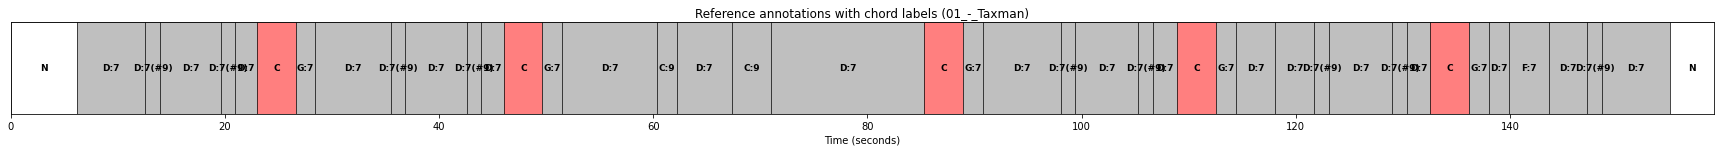

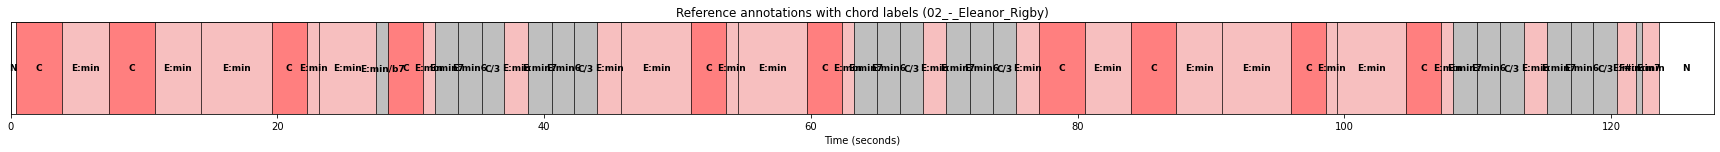

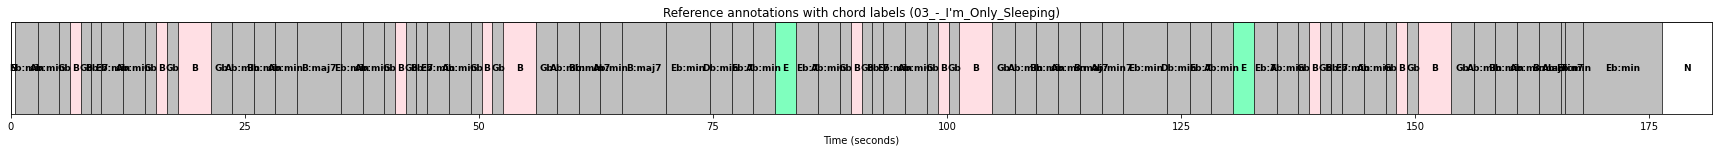

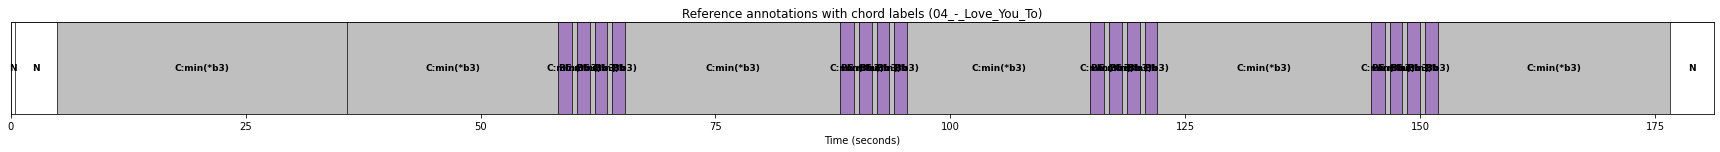

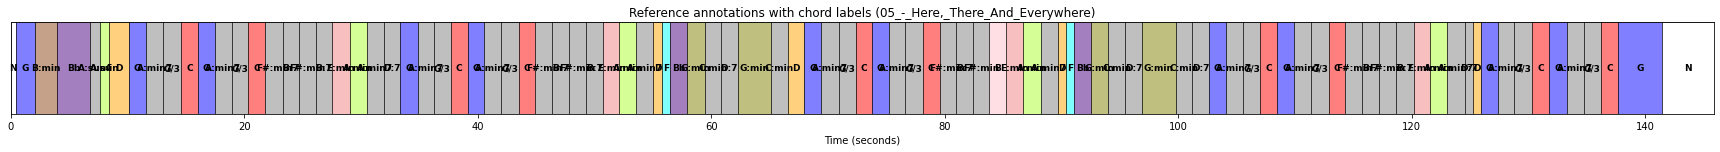

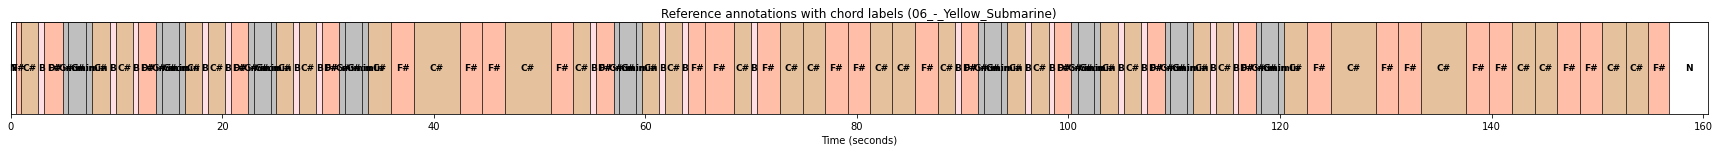

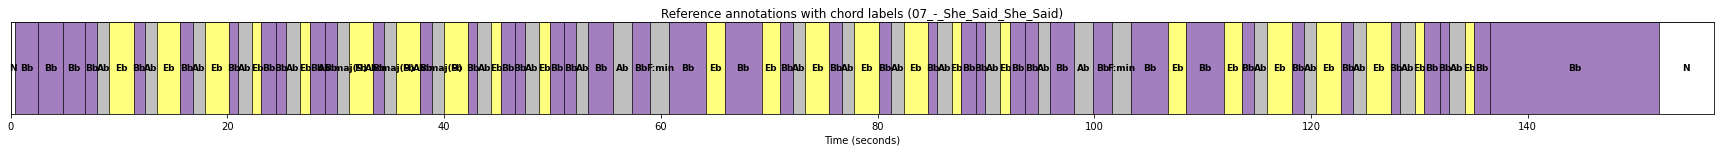

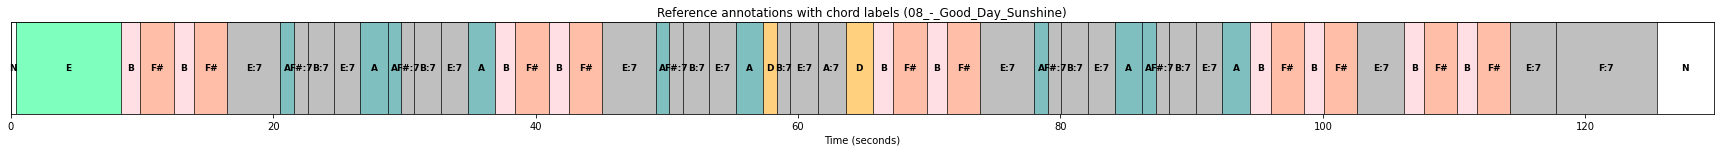

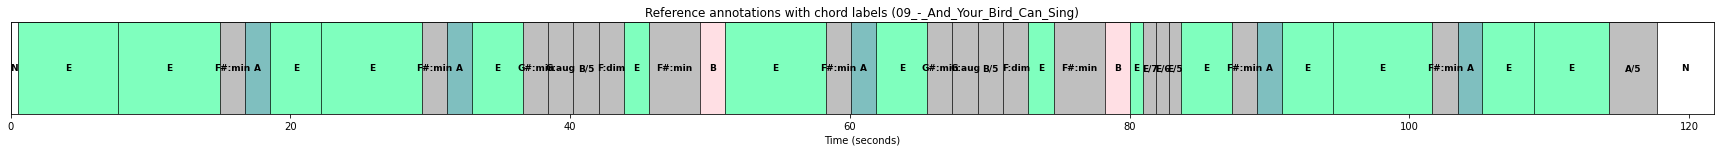

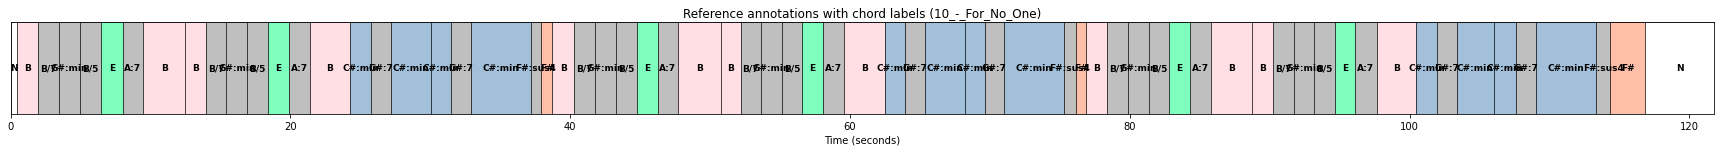

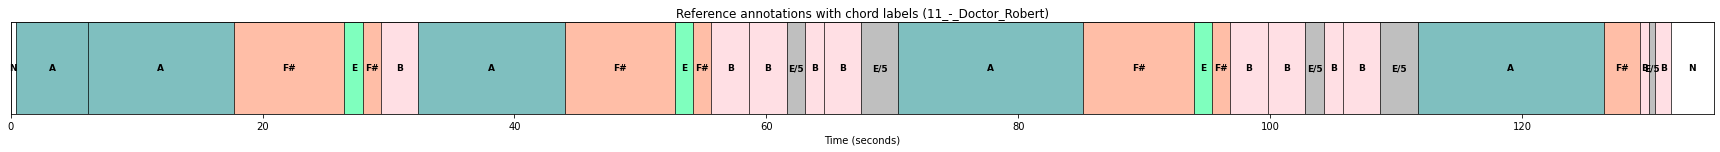

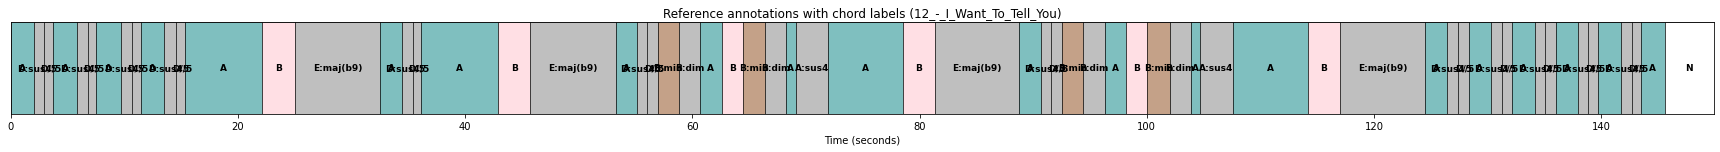

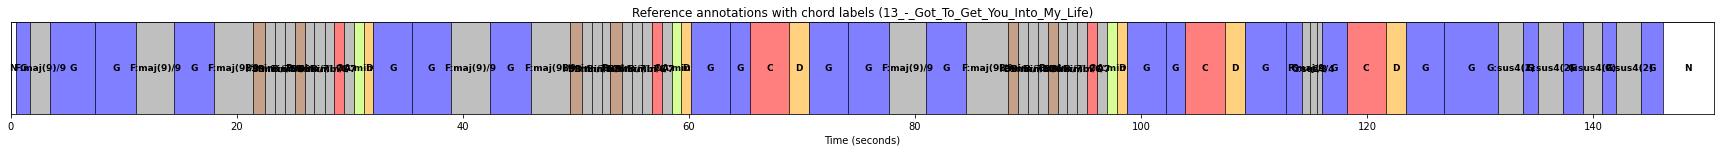

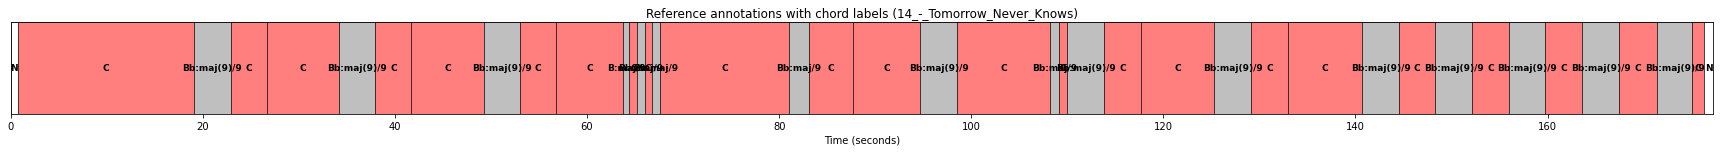

In [92]:
for i in range(len(paths)):
    path = path1+paths[i]
    ann, c_ann = read_structure_annotation(path, color_ann)
    song = songs[i]
    plt.show()
    plot_segments(ann, figsize=(24, 2), time_label='Time (seconds)', 
                           fontsize=9, colors=c_ann, alpha=0.5)
    plt.title(f'Reference annotations with chord labels ({song})')
    plt.show()